# 베이지안 추론에 대한 내용정리

https://www.datascience.com/blog/introduction-to-bayesian-inference-learn-data-science-tutorials
파이선 2로 돌려야 ㅜㅜ

## 목적
1. 데이터가 제한적
2. 오버피팅에 대해서 걱정될때
3. 어떤 사실들이 다른것들보다 그렇다고 믿을 수 있는 이유가 있으나 데이터가 없을때
4. 그저 최적의 사실을 아는 것보다 얼마가 그 사실이 확실한지에 대해서 관심이 있을 경우 

## 조건부확률 
a binomial distribution : 이항분포란 성공확률이 p이고, 그 결과가 성공 혹은 실패뿐인 실험을 nn번 반복시행할 때 성공횟수의 분포를 가리킵니다.
maximum likelihood :
argmaxθp(X |θ)
사전확률이란 데이터를 관측하기 전 가설로 세운 확률을 뜻합니다.
동전 던지기는 이항분포를 따르나 사전/사후확률은 베타분포를 따른다고 한다?

최대 우도 측정법 (Maximum likelihood Estiimator, MLE)
모수에서 어떤 추정량이 그럴듯한가를 말하는 지표를 likelihood라고 함

MLE는 주어진 데이터 바탕으로 추정량이 가장 그럴 듯한 것인가를 추정하는 방법으로 likelihood를 사용하여 모수 추정?
베이즈 추론은 사전확률과 likelihood의 결합으로 사후 확률을 추정해나가며 모수를 확률 변수의 개념으로 생각한다고 함
즉 가장 큰 차이는 모수가 고정된 미지수냐 확률 변수로 보고 최초 가정된 모수의 사전분포를 업데이트하는 것

베이지안은 일어나지 않은 일에 대한 확률을 불확실성의 개념으로 이야기 하는 것
사전 확률과 우도 확률을 안다면 사후확률을 알수 있다는 것

청바지 창고에서 청바지를 샀는데 불량이었다. 이 청바지의 공장은 3군데 그리고 사전 확률로 각 3공장의 불량률을 알고 있다고 정의해보자
특정사건에 대한 기존의 불확실성인 P(A),(구미공장에서 생산되는 청바지의 불량률) 에 추가적인 단서 B가 발생함에 따라, P(B| A)/P(B) 라는 수치가 P(A)에 곱해진다. 그 결과 P(A|B)라는 조건부 확률의 모양으로 업데이트 되는 것이다. 

P(A|B)는 사후확률 Posterior 또는 Posterior belief 
P(A)는 Prior, 또는 prior belief (사전 확률)
P(B)는 Evidence (상수 이미 주어진 것) 
P(B|A)는 Likelihood라고 한다. 
주어진 데이터가 관찰될 확률 P(B|A) 가 높을 수록 더 높은 posterior로 업데이트 된다고 




In [40]:
import numpy as np
from scipy.misc import factorial
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,7)

In [56]:
def likelihood(theta, n, x) :
    """
    likelihood function for a binomial distribution
    :param theta: [float] the proposed probability of success
    :param n: [int] the number of experitment
    :param x: [int] the number of success
    :return: 
    """
    return (factorial(n) / ( factorial(x) * factorial(n-x) ) ) * (theta ** x ) * ((1-theta) ** (n-x))

# the number of impressions for our facebook-yellow-dress campaign_impression = 10?
n_impressions = 10
# the number of clicks for our facebook-yellow-dress campaign
n_clicks = 7.

#observed click through rate
ctr = n_clicks / n_impressions

#0 to 1, all possible click through rates
possible_theta_values = map(lambda x: x/100., range(100))

#evaluate the likelihood function for possible click through rates
likelihoods = map(lambda theta: likelihood(theta, n, x) , possible_theta_values)



In [57]:
#pick the best theta
mle = list(possible_theta_values).pop(np.argmax(likelihoods))

In [58]:
mle

0.0

RuntimeError: matplotlib does not support generators as input

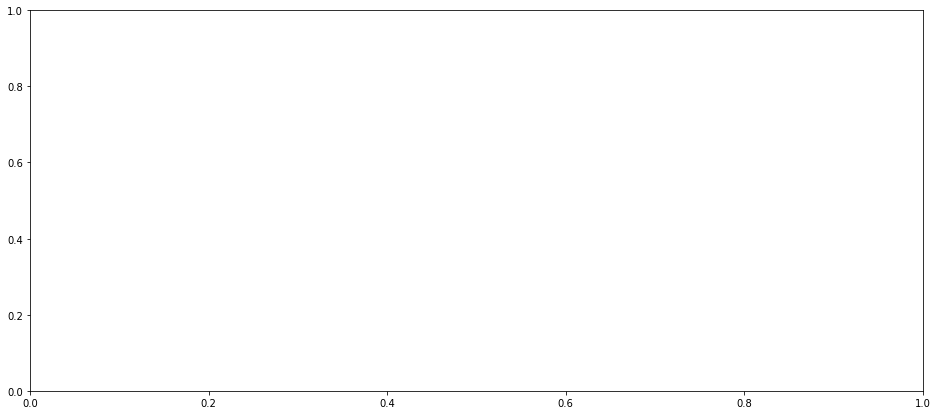

In [59]:
#plot
f, ax = plt.subplots(1)
ax.plot(possible_theta_values, likelihoods)
ax.axvline(mle, linestyle = "--")
ax.set_xlabel("Theta")
ax.set_ylabel("Likelihood")
ax.grid()
ax.set_title("Likelihood of Theta for New Campaign")
